# BOSTON HOUSE PRICE PREDICTION - Data Set 

Steps Involved:
    1. Loading the dataset
    2. EDA - Cleaning the data, filling missing values, understanding data insights
    3. ML - Linear Regression :
             Splitting data into train / test
             Score / Error
             Metrics 
    4. Predicting price for new input values

In [1]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing libraries and modules of Machine Learning
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
#importing dataset
from sklearn.datasets import load_boston

In [4]:
#Assigning the file to a variable
boston=load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

The loaded dataset is in the form of dictionary

In [5]:
#Getting the keys inside the dataset 
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
#Getting the data inside it
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
#Getting the target data
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
#Getting the column names- feature_names
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
#Making the dataset in form of dictionary into a dataframe
bos=pd.DataFrame(boston.data,columns=boston.feature_names)

In [10]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
bos.shape

(506, 13)

In [12]:
#Adding the column target into the dataframe 
bos['target']=boston.target

In [13]:
#To see the column names
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [14]:
bos.shape

(506, 14)

In [15]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [16]:
#Checking for null values
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

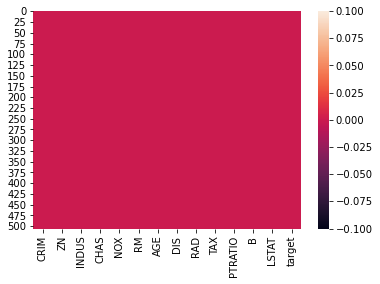

In [17]:
#Visualization method to check null values
sns.heatmap(bos.isnull())

In [18]:
#Statistical Summary
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Observations: 
    1) std is high in few columns - indicates high spread of data and possibility of outliers
    2) Large gap between 75% and Max. - Defiite presence of outliers 
    3) Mean > Median(50%) - Right Skew
    4) Mean < Median(50%) - Left Skew

In [19]:
#To see the skewness present in each column
print(bos.skew())

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64


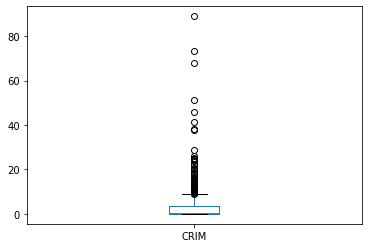

In [20]:
#Visualization 
bos['CRIM'].plot.box()

Above is the box plot for one column

CRIM          AxesSubplot(0.125,0.536818;0.0945122x0.343182)
ZN         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
INDUS      AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
CHAS       AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
NOX        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
RM         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
AGE        AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
DIS              AxesSubplot(0.125,0.125;0.0945122x0.343182)
RAD           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
TAX           AxesSubplot(0.351829,0.125;0.0945122x0.343182)
PTRATIO       AxesSubplot(0.465244,0.125;0.0945122x0.343182)
B             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
LSTAT         AxesSubplot(0.692073,0.125;0.0945122x0.343182)
target        AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

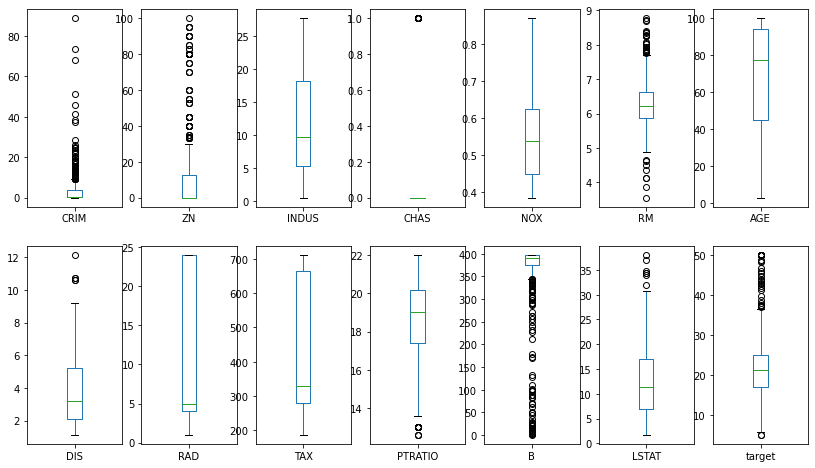

In [21]:
#Plotting box for all columns 
bos.plot(kind='box',subplots=True,layout=(2,7),figsize=(14,8))

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(bos))
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 0.44105193, 1.0755623 ,
        0.15968566],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.44105193, 0.49243937,
        0.10152429],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.39642699, 1.2087274 ,
        1.32424667],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.44105193, 0.98304761,
        0.14880191],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.4032249 , 0.86530163,
        0.0579893 ],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.44105193, 0.66905833,
        1.15724782]])

In [23]:
threshold=3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

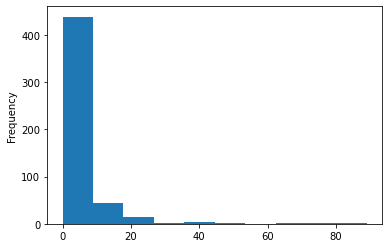

In [24]:
#To check skewness visually
bos['CRIM'].plot.hist()

To remove the skewness:
    1) Logtransformation - Method using Numpy
    2) Squareroot transormation - Method in Numpy
    3) Boxcox - Method in stats module of scipy library

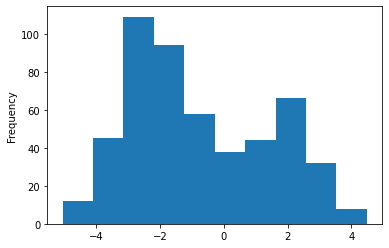

In [25]:
#Removing skew using logtransformation
bos['CRIM']=np.log(bos['CRIM'])
bos['CRIM'].plot.hist()

In [26]:
#Checking the skewness - earlier skewness is 5.22 , now it is reduced
bos['CRIM'].skew()

0.4059344988496048

In [27]:
#Other method to remove skewness 
from scipy.stats import boxcox
print(bos['ZN'].skew())
bos['ZN']=boxcox(bos['ZN'])[0]
bos['ZN'].plot.hist()
print(pd.Series(bos['ZN'].skew()))

2.2256663227354307


ValueError: Data must be positive.

boxcox will not work for the data having 0 or -ve values inside it 

Beore: 2.2256663227354307
After: 1.4762928299237978


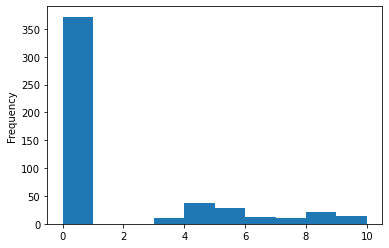

In [28]:
#Other method  squareroot
print('Beore:',bos['ZN'].skew())
bos['ZN']=np.sqrt(bos['ZN'])
print('After:',bos['ZN'].skew())
bos['ZN'].plot.hist()

## Bivariate Analysis

Checking the relationship between two variables

Text(0, 0.5, 'target')

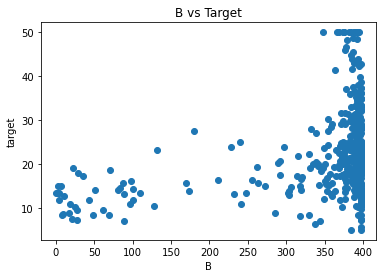

In [29]:
plt.scatter(bos['B'],bos['target'])
plt.title('B vs Target')
plt.xlabel('B')
plt.ylabel('target')

From above we can say that after a certain increase in B numbers the price got increased and stabilized at a point

we can see for other columns also simillarly to understand relation between them

In [30]:
#Finding Collinearity
corr_hmap=bos.corr()
corr_hmap

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.544169,0.730821,0.028496,0.788616,-0.306943,0.658284,-0.681903,0.853407,0.828234,0.389554,-0.478755,0.626615,-0.454302
ZN,-0.544169,1.000000,-0.583917,-0.042605,-0.548889,0.333444,-0.588399,0.697175,-0.344420,-0.371003,-0.440846,0.203898,-0.439516,0.382970
INDUS,0.730821,-0.583917,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.028496,-0.042605,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.788616,-0.548889,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.306943,0.333444,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.658284,-0.588399,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.681903,0.697175,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.853407,-0.344420,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.828234,-0.371003,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


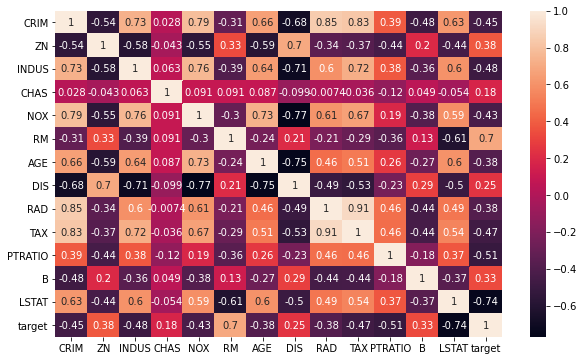

In [31]:
# To better understand collinearity in easy way we use visualization 
plt.figure(figsize=(10,6))
sns.heatmap(corr_hmap,annot=True)

We can see that LSTAT is highly -ve correlated to target.Hence it is our choice to remove the column with high -ve correlation

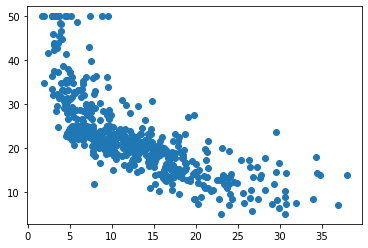

In [33]:
#visualizing scatter plot b/w those variables
plt.scatter(bos['LSTAT'],bos['target'])

In [34]:
#Remove the column LSTAT
bos.drop('LSTAT',axis=1,inplace=True)

In [35]:
#Verifying the shape of dataframe
bos.shape

(506, 13)

In [36]:
#Checking the columns 
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'target'],
      dtype='object')

Hence verified the column is dropped from the dataframe

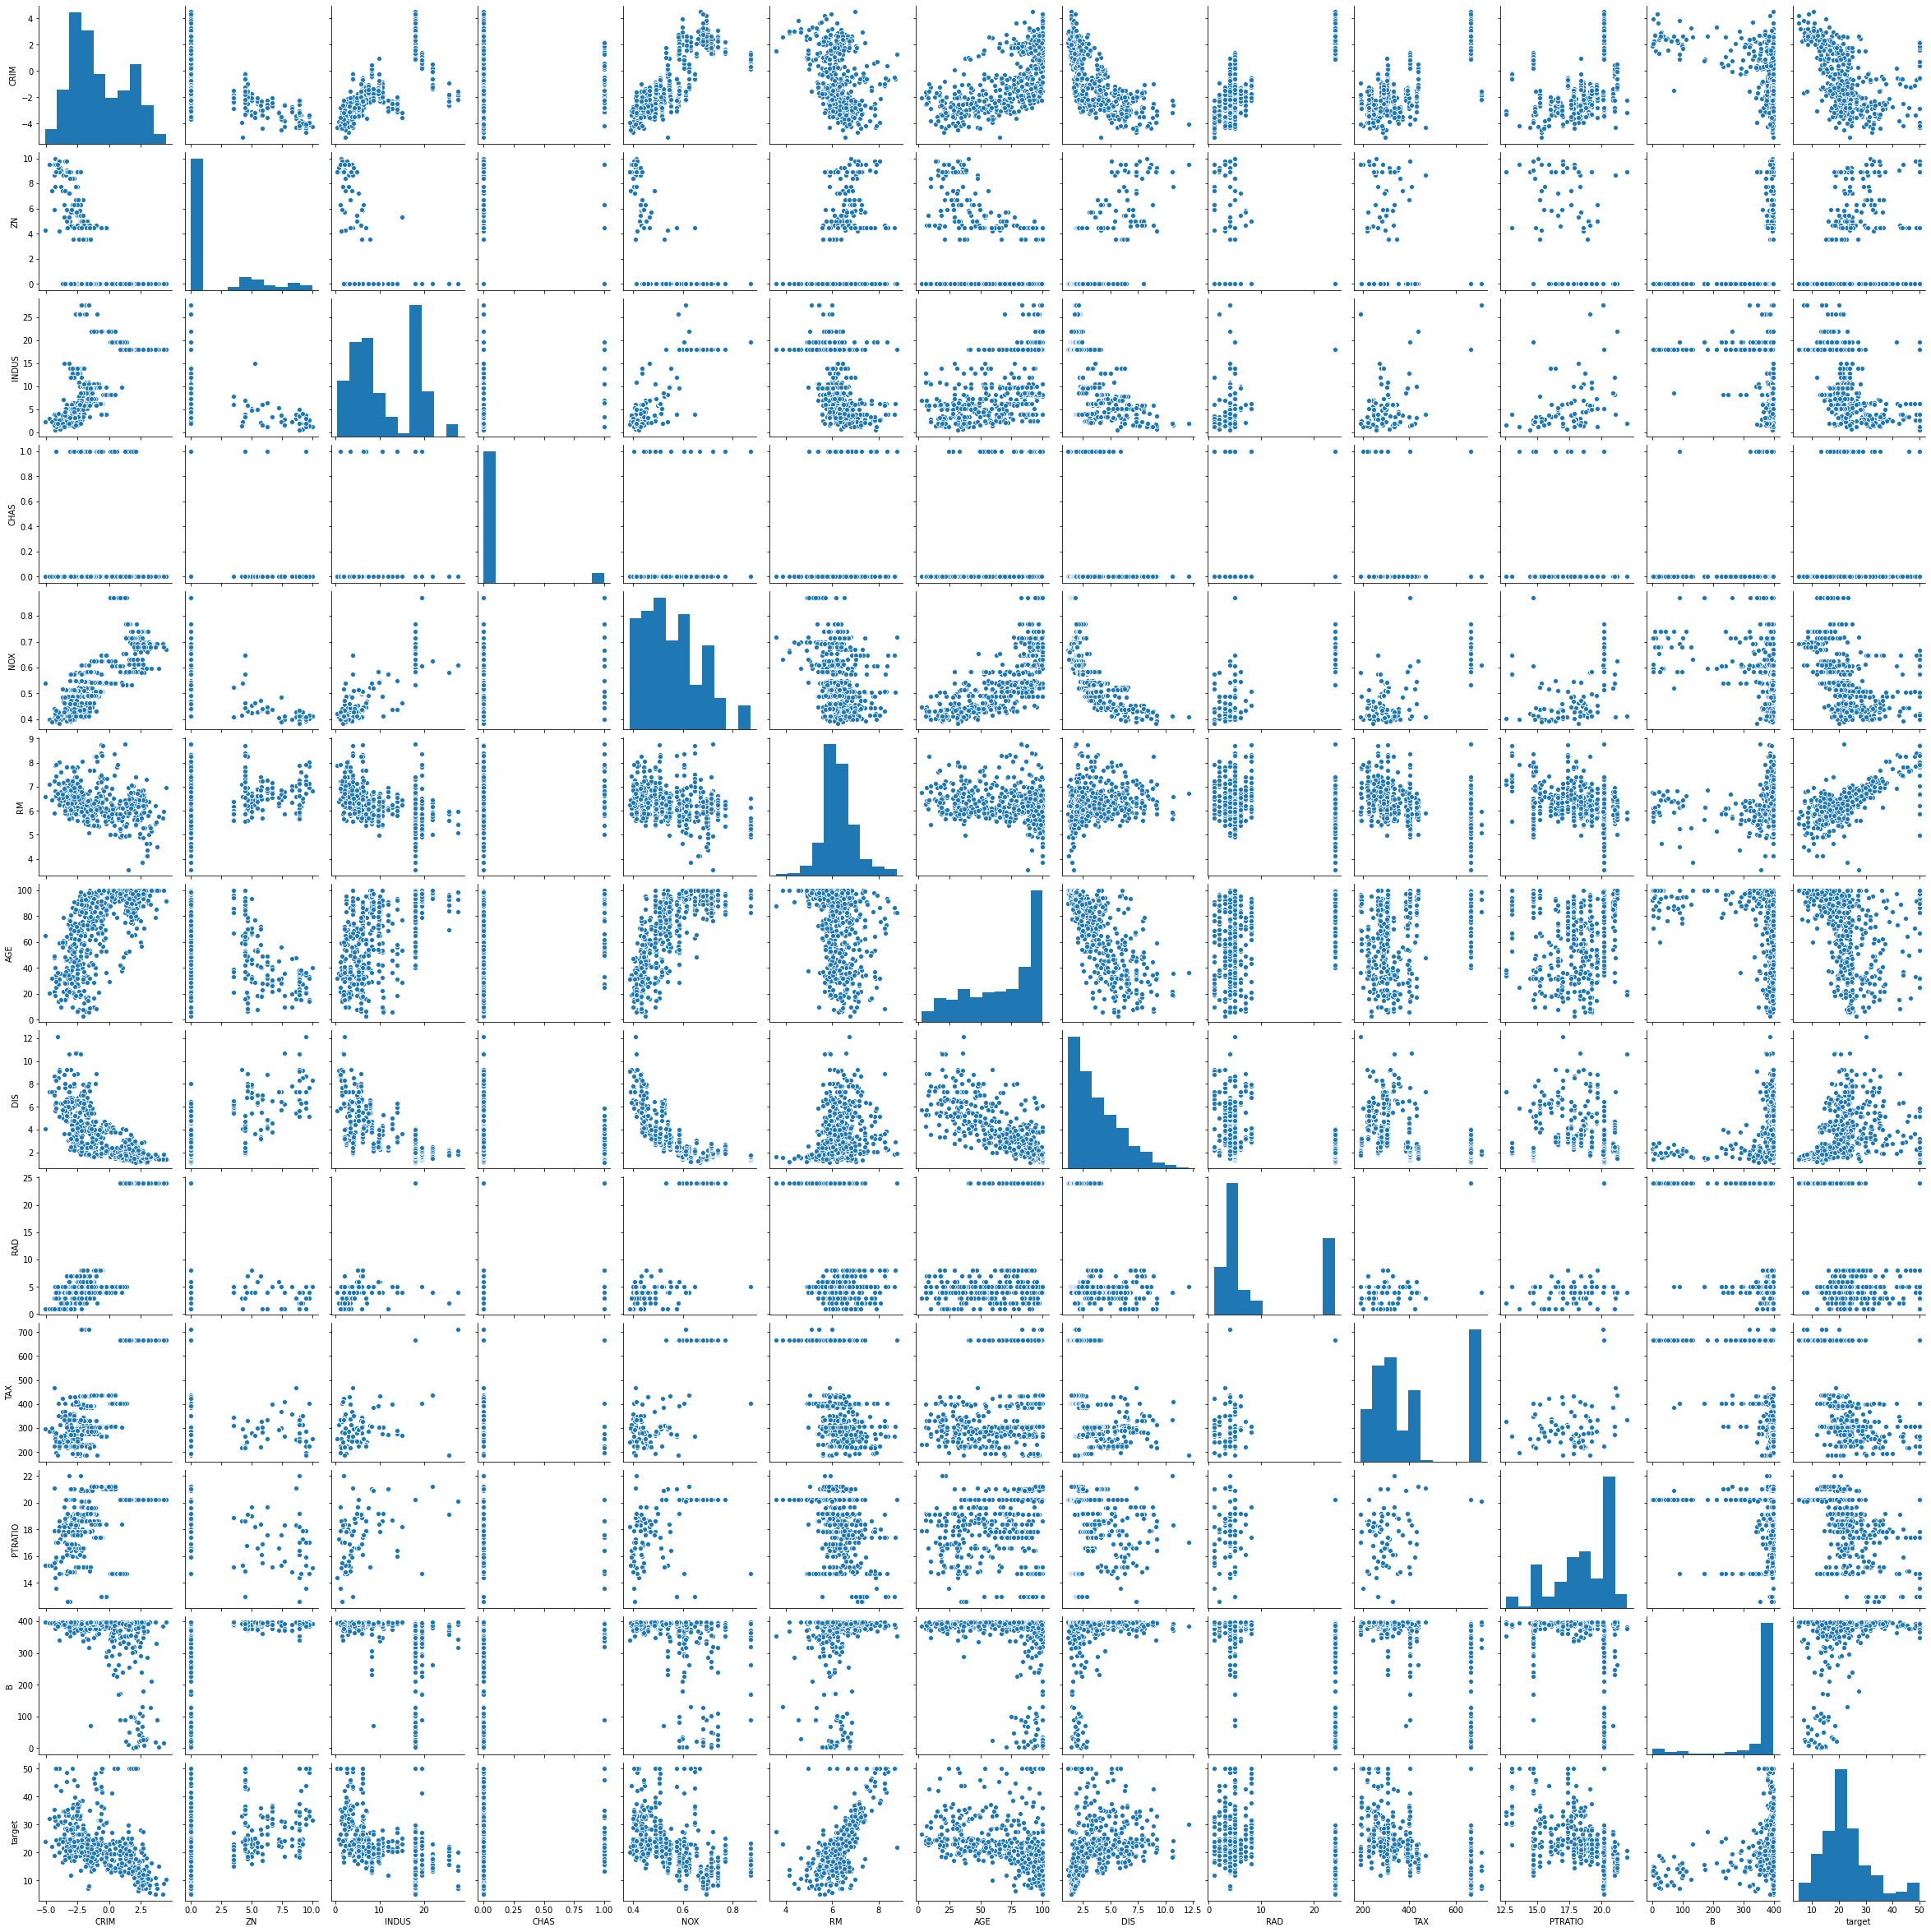

In [37]:
#Visualizing the plot b/w each and every column with respect to other
sns.pairplot(bos)

## Remove outliers 


Step 1 : Find the ZSCORE
Step 2 : Fix Threshold to 3
Step 3 : Copy all the data with Threshold < 3 to new dataset (To remove outliers) 
    

In [38]:
bos_new=bos[(z<3).all(axis=1)]

In [39]:
bos_new.shape

(415, 13)

In [40]:
bos_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,4.242641,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,-3.600502,0.000000,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,-3.601235,0.000000,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,-3.430523,0.000000,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,-2.672924,0.000000,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.000000,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,22.4
502,-3.095111,0.000000,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,20.6
503,-2.800824,0.000000,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,23.9
504,-2.211009,0.000000,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,22.0


EDA process completed:
    No null values
    No outliers
    Reduced skewness
    Data is clean and clear 

# Machine Learning :

Spliting data into x and y

In [44]:
#x - all columns except target
x=bos_new.iloc[:,0:-1]
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,-5.064036,4.242641,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,-3.600502,0.000000,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,-3.601235,0.000000,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,-3.430523,0.000000,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,-2.672924,0.000000,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [45]:
#y - Target column
y=bos_new.iloc[:,-1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [46]:
print('x-shape:',x.shape)
print('y-shape:',y.shape)

x-shape: (415, 12)
y-shape: (415,)


## Splitting the dataset into train & test

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

x, y are splitted into train & test, test_size: Indicates what percent of dataset to be given for test
Best Practice: 
          Train - 70 to 80%
          Test  - 20 to 30%

In [48]:
x_train.shape

(278, 12)

In [49]:
y_train.shape

(278,)

In [50]:
x_test.shape

(137, 12)

In [53]:
y_test.shape

(137,)

In [54]:
#Performing Linear Regression 
lm=LinearRegression()

In [61]:
#Training the machine
lm.fit(x_train,y_train)

LinearRegression()

Equation: Linear Regression
y=a+b1x1+b2x2+b3x3+............. 
y - Target
a- intercept
b1,b2,.... are - Coefficients

In [56]:
#Coefficients contributing the price 
lm.coef_

array([ 4.20107204e-01, -7.33616126e-02, -4.03862533e-02, -7.49469931e-14,
       -1.23908930e+01,  8.31024593e+00, -6.74958251e-02, -1.12488265e+00,
        5.34737983e-02, -1.16996703e-02, -7.92187861e-01,  9.30623364e-03])

In [57]:
#intercept
lm.intercept_

1.983869035055985

In [60]:
bos_new.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'target'],
      dtype='object')

In [70]:
#Checking accuracy of the model
lm.score(x_train,y_train)

0.7450119286943324

From above we can say that model developed is 74% accurate

In [74]:
#Prediciting the value
pred=lm.predict(x_test)
print('Predicted prices:',pred)
print('Actual prices:',y_test)

Predicted prices: [20.45168573 14.52019351 31.42967261 18.3069961  13.11777161 20.77168031
 17.32313488 25.10347626 29.58033913 10.81655364 17.7284031  15.69675497
  8.99210376 24.29629885 27.93681697 10.67189387 25.61398791 27.38533415
 24.86303693 14.02481819 21.73039719 19.03733167 23.56195445 12.03370348
 21.9576397  21.59991725 31.67677043 27.62259851 22.14473797 25.01876689
 32.57545705 14.74189707 13.54832424 26.22086213 15.57559325 15.07756916
 26.87891623 22.3572384  13.77222749 19.1447321  17.10739289 18.06892298
 20.56075204 26.58750169 17.10981313 26.15912393 19.9527086  19.50701344
 17.76492844 24.44699271 20.77161761 19.06951418 39.77146615 13.45946854
 19.03536034 22.02308623 18.70268163 41.24085472 20.12757007 18.1515857
 26.53923876 16.79547193 24.44357011 28.07434513 14.52842251  5.36330712
 34.10754535 19.63309521 19.13504835 22.49835296 35.24732989 19.96569906
 24.24094327 24.57111093 15.2870426  22.51685956 16.45349721 17.94636363
 22.39303667 16.41852222 17.622301

In [78]:
#Checking the errors
print('Error:')
print("Mean_absolute_error:",mean_absolute_error(y_test,pred))
print("Mean_squared_error:",mean_squared_error(y_test,pred))
print("Root_Mean_squared_error:",np.sqrt(mean_squared_error(y_test,pred)))

Error:
Mean_absolute_error: 2.829957759398437
Mean_squared_error: 25.675871541206575
Root_Mean_squared_error: 5.067136424175549


## METRICS

To check the performance of model 

In [79]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.555949638355204


There is a change of 0.55 in y each and every time when x changes

In [80]:
#Predict price for new inputs
t=np.array([0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90])
t.shape


(12,)

In [82]:
t=t.reshape(1,-1)
t.shape

(1, 12)

In [83]:
lm.predict(t)

array([20.17844867])